<a href="https://colab.research.google.com/github/soykuvvetberat34/GlobalAIHub_HomeworkProject/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [62]:
dataFrame=pd.read_csv("/content/heart_2020_cleaned.csv")

In [121]:
x = dataFrame.iloc[:, [1,5,6,14]]
x=x.astype(int)
x['BMI']=x['BMI'].astype(int)
x['PhysicalHealth']=x['PhysicalHealth'].astype(int)
x['MentalHealth']=x['MentalHealth'].astype(int)

In [122]:
print(x)

        BMI  PhysicalHealth  MentalHealth  SleepTime
0        16               3            30          5
1        20               0             0          7
2        26              20            30          8
3        24               0             0          6
4        23              28             0          8
...     ...             ...           ...        ...
319790   27               7             0          6
319791   29               0             0          5
319792   24               0             0          6
319793   32               0             0         12
319794   46               0             0          8

[319795 rows x 4 columns]


In [123]:
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [124]:
# PCA ile veriyi 2 boyuta indirgeme
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


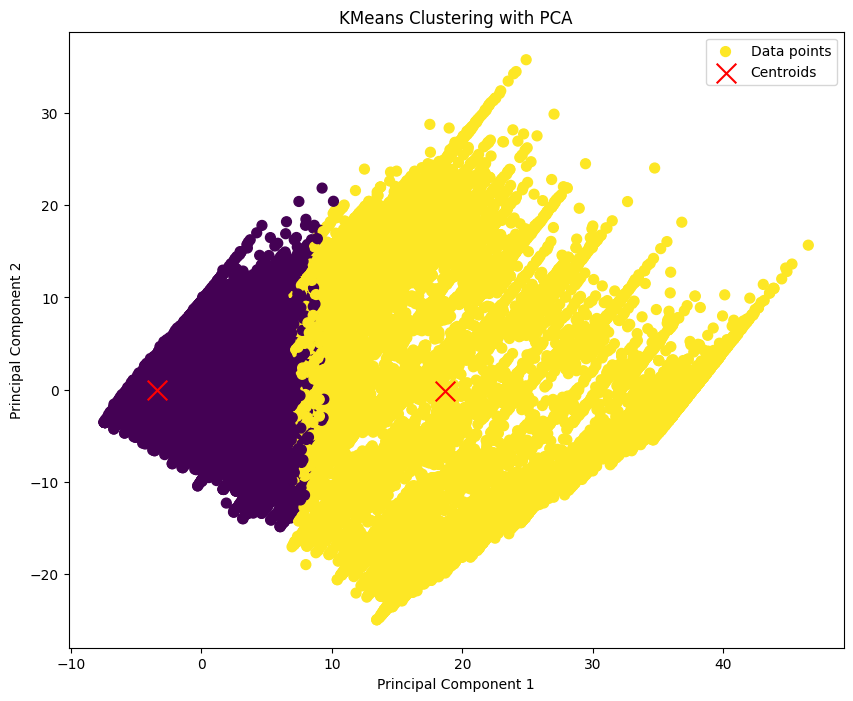

In [125]:
# Kümeleri ve merkezleri al
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# PCA ile indirgenmiş verinin kümelerini görselleştirme
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', marker='o', s=50, label='Data points')

# Küme merkezlerini çizmek için PCA uygulanmış merkezleri de hesapla
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, c='red', label='Centroids')

plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()